In [15]:
import numpy as np
import asyncio
from icmplib import ping, async_multiping
import matplotlib.pyplot as plt

Round 1/101
Round 2/101
Round 3/101
Round 4/101
Round 5/101
Round 6/101
Round 7/101
Round 8/101
Round 9/101
Round 10/101
Round 11/101
Round 12/101
Round 13/101
Round 14/101
Round 15/101
Round 16/101
Round 17/101
Round 18/101
Round 19/101
Round 20/101
Round 21/101
Round 22/101
Round 23/101
Round 24/101
Round 25/101
Round 26/101
Round 27/101
Round 28/101
Round 29/101
Round 30/101
Round 31/101
Round 32/101
Round 33/101
Round 34/101
Round 35/101
Round 36/101
Round 37/101
Round 38/101
Round 39/101
Round 40/101
Round 41/101
Round 42/101
Round 43/101
Round 44/101
Round 45/101
Round 46/101
Round 47/101
Round 48/101
Round 49/101
Round 50/101
Round 51/101
Round 52/101
Round 53/101
Round 54/101
Round 55/101
Round 56/101
Round 57/101
Round 58/101
Round 59/101
Round 60/101
Round 61/101
Round 62/101
Round 63/101
Round 64/101
Round 65/101
Round 66/101
Round 67/101
Round 68/101
Round 69/101
Round 70/101
Round 71/101
Round 72/101
Round 73/101
Round 74/101
Round 75/101
Round 76/101
Round 77/101
Round 78

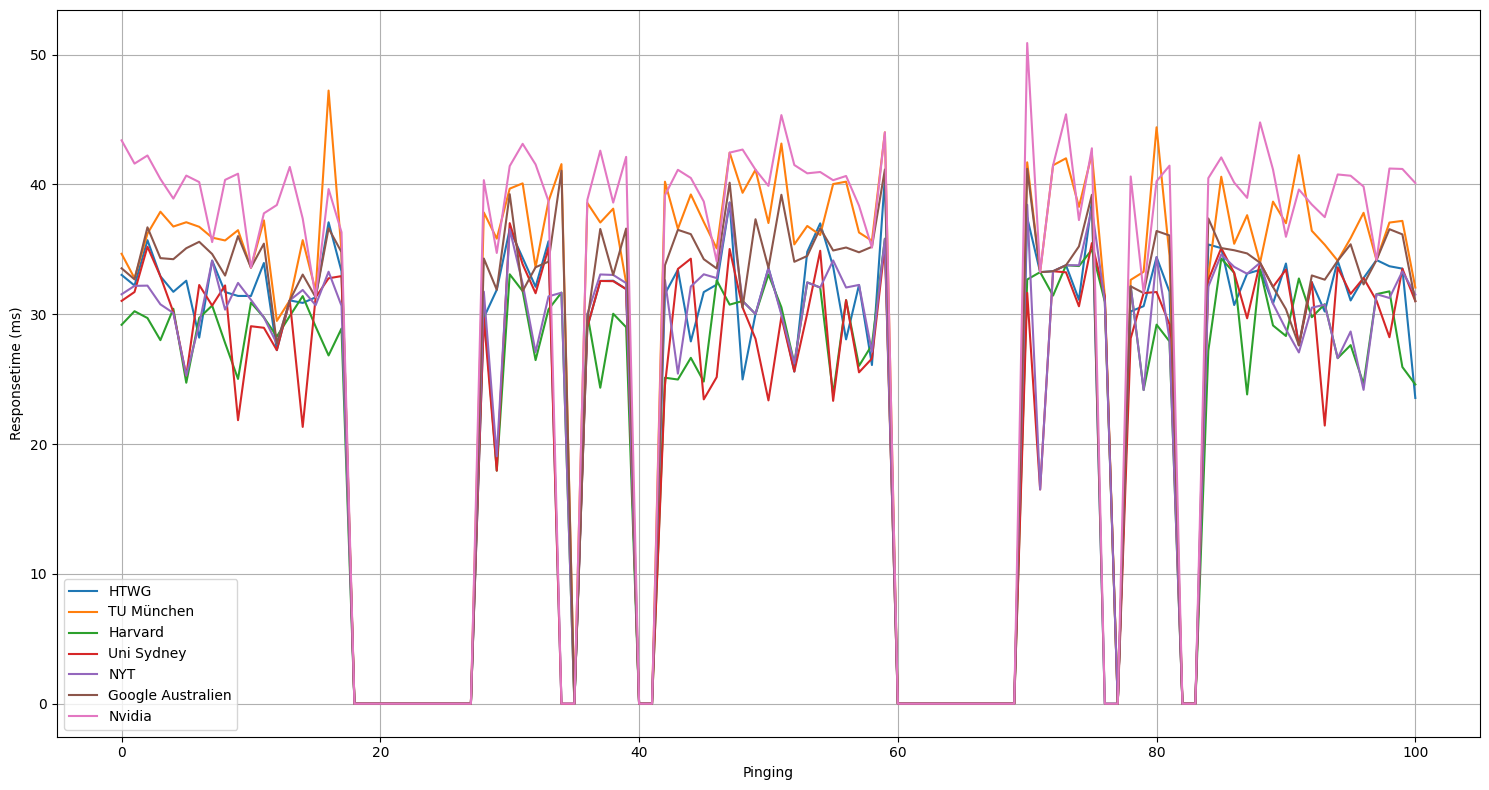

In [18]:
addresses = [("HTWG", "141.37.20.31"),
             ("TU München", "129.187.255.109"),
             ("Harvard", "192.0.66.177"),
             ("Uni Sydney", "23.36.162.215"),
             ("NYT", "146.75.117.164"),
             ("Google Australien", "142.250.185.131"),
             ("Nvidia", "23.36.162.199")]
count = 101
results = {name: [] for name, _ in addresses}
ips = {ip for _, ip in addresses}
names = {name for name, _ in addresses}

async def pinging():
    for i in range(count):
        print(f"Round {i+1}/{count}")
        hosts = await async_multiping(ips, interval=0.0,
                                timeout=2, privileged=False,
                                concurrent_tasks=50)

        for name, host in zip(names, hosts):
            response_time = host.avg_rtt if host.is_alive else 0
            results[name].append(response_time)

await pinging()

plt.figure(figsize=(15, 8))

for name in results:
    plt.plot(results[name], label=name)

plt.xlabel("Pinging")
plt.ylabel("Responsetime (ms)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()